# Heart Attack possibility 

## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Analysis

In [2]:
data = pd.read_csv("Heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data description
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack
Attribute Information  
1) age  
2) sex  
3) chest pain type (4 values)  
4) resting blood pressure  
5) serum cholestoral in mg/dl  
6) fasting blood sugar > 120 mg/dl  
7) resting electrocardiographic results (values 0,1,2)  
8) maximum heart rate achieved  
9) exercise induced angina  
10) oldpeak = ST depression induced by exercise relative to rest  
11) the slope of the peak exercise ST segment  
12) number of major vessels (0-3) colored by flourosopy  
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
data.shape

(303, 14)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check for null values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no null values!

## Check for data types of features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Discovering the trend of each and every feature

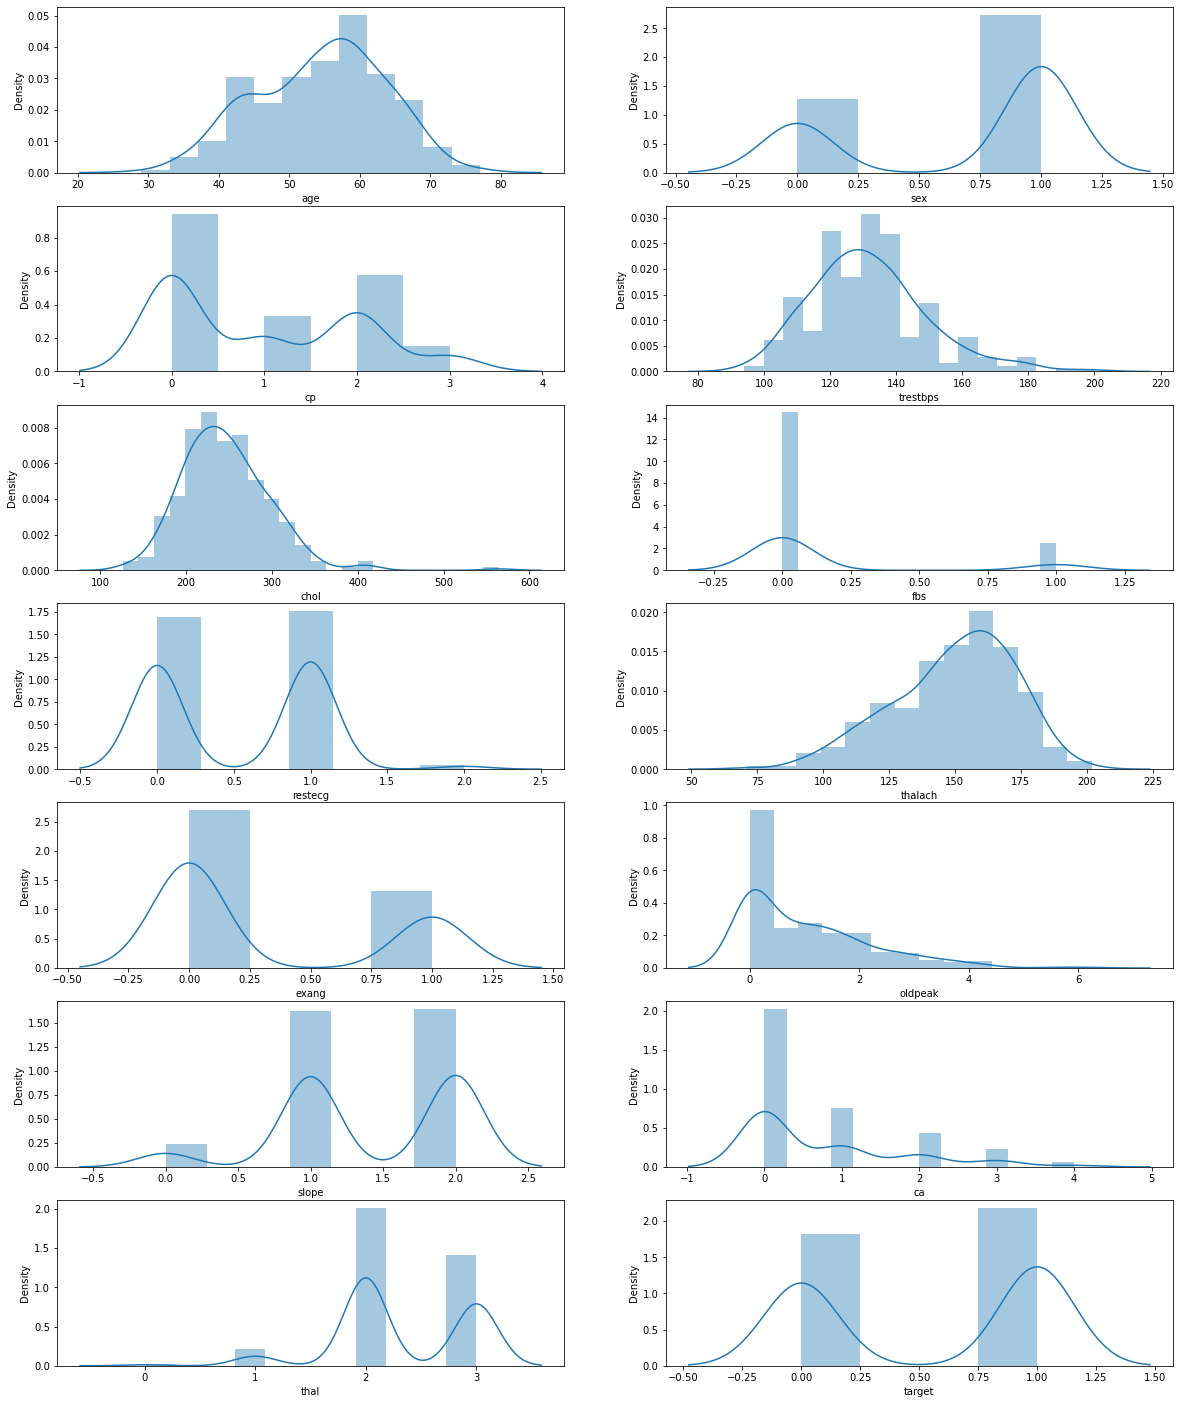

In [19]:
fig = plt.figure(figsize=(20,25))
itr = 1
for i in data.columns:
    if itr<=14:
        ax = plt.subplot(7,2,itr)
        sns.distplot(data[i])
    itr+=1
plt.show()

Most of the continuous features looks normally distributed.

## Correlation

<AxesSubplot:>

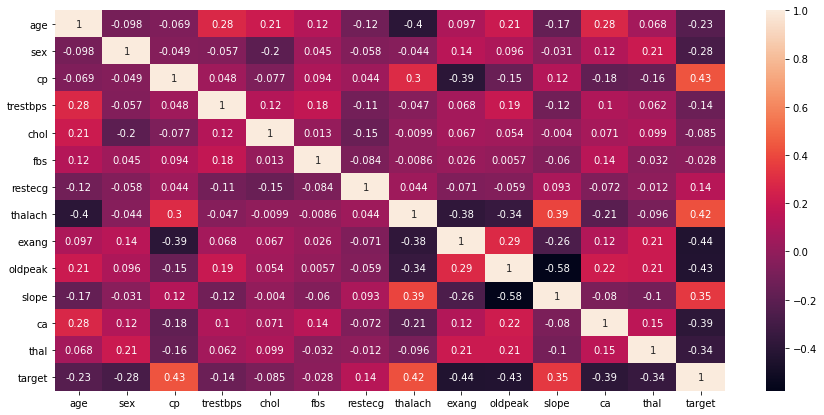

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

## Checking for Outliers

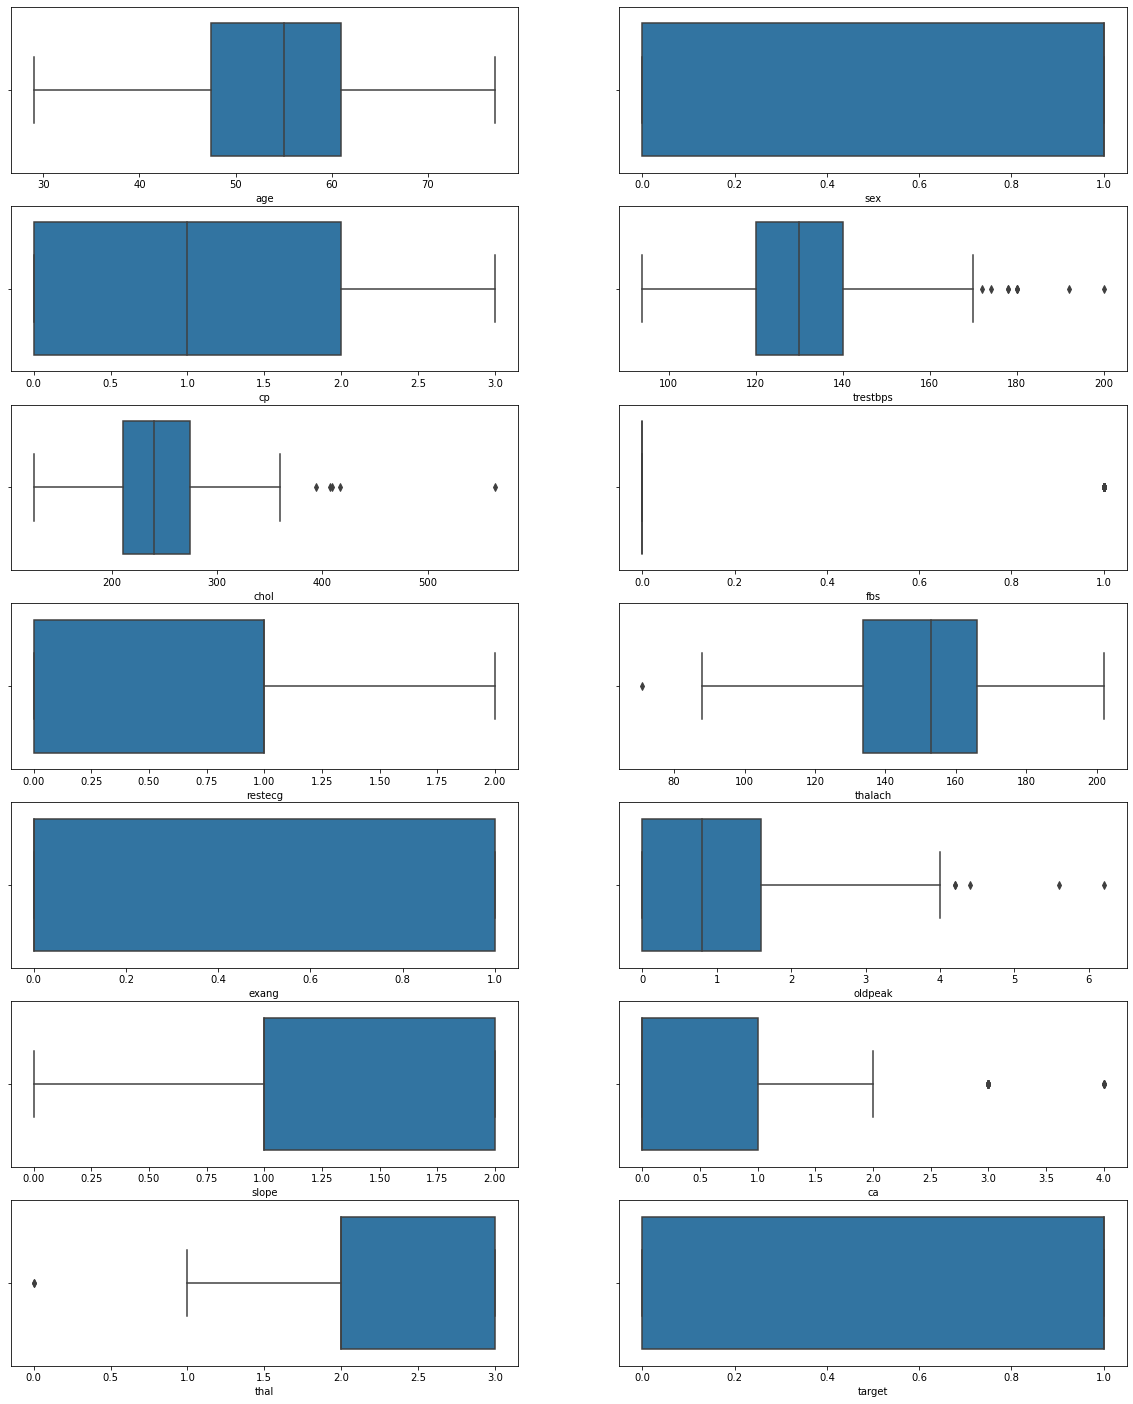

In [28]:
fig = plt.figure(figsize=(20,25))
itr = 1
for i in data.columns:
    if itr<=14:
        ax = plt.subplot(7,2,itr)
        sns.boxplot(data[i])
    itr+=1
plt.show()

In feature trestbps and chol, we have a lot of outliers that cannot be ignored, thus we are replacing them with limit after which all data is considered as outlier

In [51]:
df = data.copy()
df.loc[df['trestbps']>160,'trestbps'] = 160
df.loc[df['chol']>350,'chol'] = 350

note that in rest other features, we have 2-5 outliers that cannot be removed due to loss in information, thus it is better to ignore those rows.

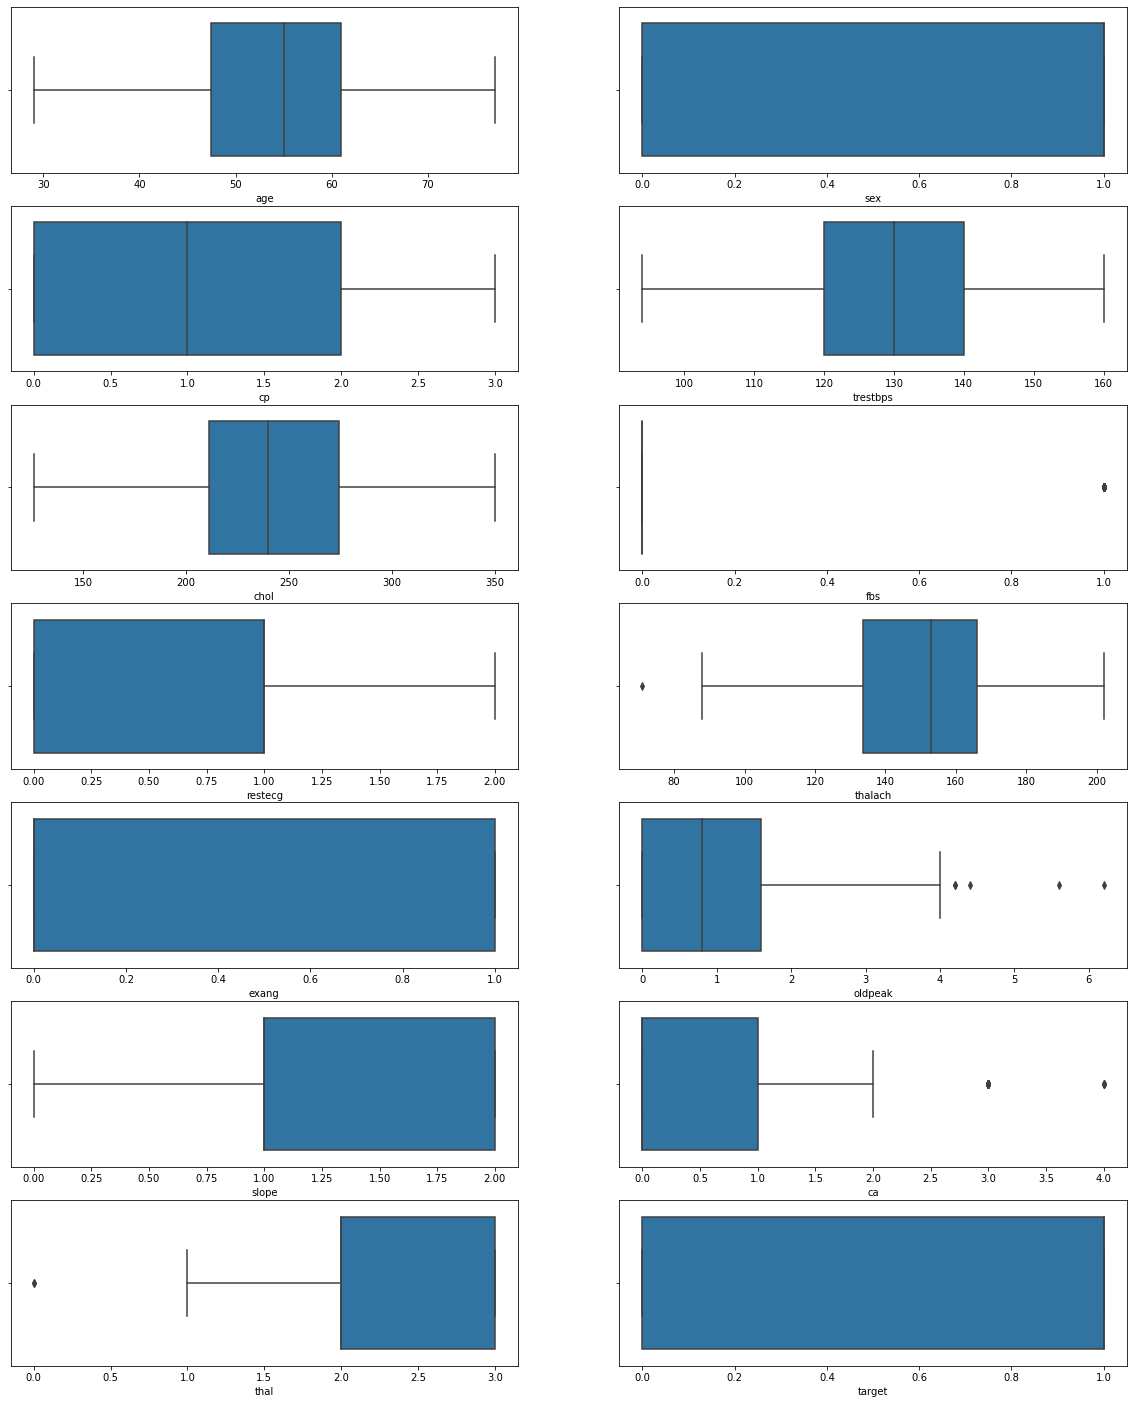

In [54]:
fig = plt.figure(figsize=(20,25))
itr = 1
for i in data.columns:
    if itr<=14:
        ax = plt.subplot(7,2,itr)
        sns.boxplot(df[i])
    itr+=1
plt.show()

In [55]:
data = df

## Training our data

In [56]:
X = data.drop('target',axis=1)
y = data['target']

Importing Libraries

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

standard scaling data

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

train and test data split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=47)

model training

In [65]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred = model.predict(X_test)

validation

In [69]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[23, 10],
       [ 4, 39]], dtype=int64)

tp = true positive  
tn = true negative  
fp = false positive  
fn = false negative

In [70]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

accuracy = values predicted correctly / total values

In [72]:
accuracy = (tp+tn) / (tp+tn+fp+fn)
accuracy

0.8157894736842105

recall = total true values predicted correctly out of all actual true values  
In this model, we need to have a good recall since it would be problematic that people that have high chance of heart attack are detected with no risk to heart attack. Thus model needs to have high recall here.

In [73]:
recall = (tp)/(tp+fn)
recall

0.8518518518518519

 we achieved a very good value of recall

precision = values that are actually true out of all predicted true values.

In [74]:
precision = (tp)/(tp+fp)
precision

0.696969696969697

### Other important metrics

In [87]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8019732205778717

In [84]:
f1_score(y_test,y_pred)

0.8478260869565216

In [85]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

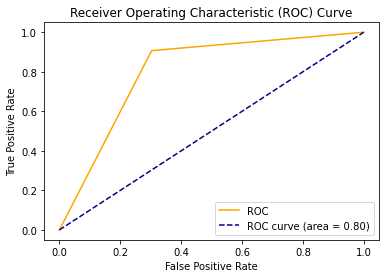

In [86]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [89]:
import pickle
pickle.dump(model,open("HeartAttackTrained.p","wb"))